In [51]:
import numpy as np
import matplotlib.pyplot as  plt

In [151]:
class pca():
    def __init__(self, n_components: int= None):
        self.n_components= n_components

    def fit_transform(self, X: np.ndarray):
        if not self.n_components:
            n_components= min(X.shape)

        #Scale the data set
        self.X_scaled= X- np.mean(X, axis= 0)

        self.cov= np.cov(self.X_scaled.T) #Calculating the covariance matrix

        e_val, e_vec= np.linalg.eig(self.cov) #Calculating the eigen values and eigen vectors

        #Sorting the eigen vectors accoridng to the maximum eigenvalue
        sorted_index= np.argsort(e_val)[::-1]
        self.e_val= e_val[sorted_index]
        self.e_vec= e_vec[:, sorted_index]

        #Eigenvectors
        self.prinicipal_components= self.e_vec[:, :self.n_components]

        return X.dot(self.prinicipal_components)



In [64]:
data= [[1, 1.1],
       [1.5, 1],
       [2, 1.3],
       [2.5, 1.5],
       [3, 0.9]]
data= np.matrix(data)

(0.8, 1.8)

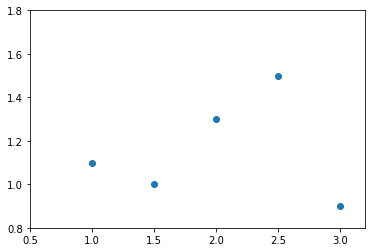

In [74]:
#visualizing the data set
figure= plt.figure()
plt.scatter([data[:, 0]], [data[:, 1]])
plt.xlim([0.5, 3.2])
plt.ylim([0.8, 1.8])

In [88]:
# We want to reduce the dimensionality using PCA
pca.fit_transform(data)

matrix([[1.0239901 , 1.07770324],
        [1.52166578, 0.96671261],
        [2.02815337, 1.2556249 ],
        [2.53243799, 1.44456146],
        [3.01909877, 0.83369217]])

In [ ]:
# Check variance along all the directions
print('variance along x axis:', np.var(data[:, 0]))
print('variance along y axis', np.var(data[:, 1]))

variance along x axis: 0.5
variance along y axis 0.0464


In [91]:
# covariance and correlaton are quite similar. if both r.v are inncreasing or decreasing
# they have high covariance(correation). Covariance are bounded between -1 to 1 and correlation  
cov_mat= pca.cov
print('covariance matrix:\n', cov_mat)

covariance matrix:
 [[0.625  0.0125]
 [0.0125 0.058 ]]


cov_mat[0,0]= var(x) <br>
cov_mat[0,1]= cov[1,0]= cov(x, y), <br>
cov_mat[1,1]= var(y)

In [92]:
pca.e_val

array([0.62527544, 0.05772456])

In [93]:
pca.e_vec

array([[ 0.99975731, -0.0220298 ],
       [ 0.0220298 ,  0.99975731]])

In [103]:
max_projected_data= data.dot(pca.e_vec[:, 0])
min_projected_data= data.dot(pca.e_vec[:, 1])

In [102]:
print('Actual data along x axis:',data[:, 0])
print('Projected data along x axis:',max_projected_data)

Actual data along x axis: [[1. ]
 [1.5]
 [2. ]
 [2.5]
 [3. ]]
Projected data along x axis: [[1.0239901  1.52166578 2.02815337 2.53243799 3.01909877]]


In [104]:
print('Actual data along x axis:',data[:, 1])
print('Projected data along x axis:',min_projected_data)

Actual data along x axis: [[1.1]
 [1. ]
 [1.3]
 [1.5]
 [0.9]]
Projected data along x axis: [[1.07770324 0.96671261 1.2556249  1.44456146 0.83369217]]
